In [1]:
import numpy as np

from robspy.synthacc import API 
from synthacc.recordings import Accelerogram, plot_seismograms
from synthacc.response import plot_response_spectra

In [2]:
api = API()

In [3]:
r_t = api.get_recording('MOLT', '2016-10-03 19:50:20', '2016-10-03 19:50:30')
r_s = api.get_recording('MOLS', '2016-10-03 19:50:20', '2016-10-03 19:50:30')
r_b = api.get_recording('DSLB', '2016-10-03 19:50:20', '2016-10-03 19:50:30')

C:\Miniconda3\envs\phd_py36\lib\site-packages\obspy\signal\detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


In [4]:
n_t = r_t.get_component('N')
e_t = r_t.get_component('E')

n_s = r_s.get_component('N')
e_s = r_s.get_component('E')

n_b = r_b.get_component('N')
e_b = r_b.get_component('E')

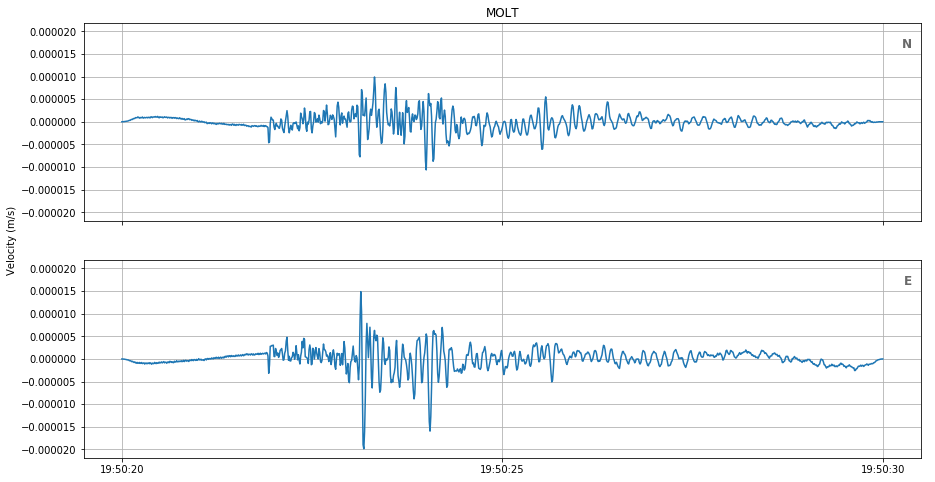

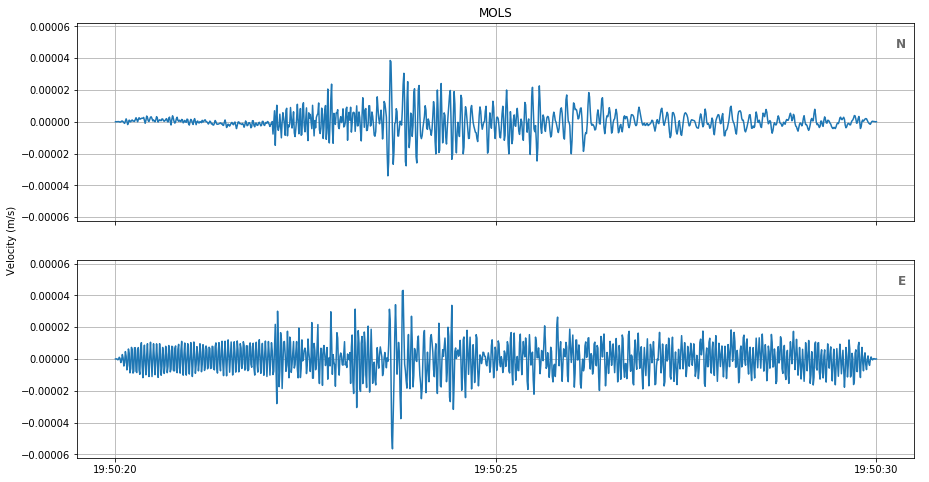

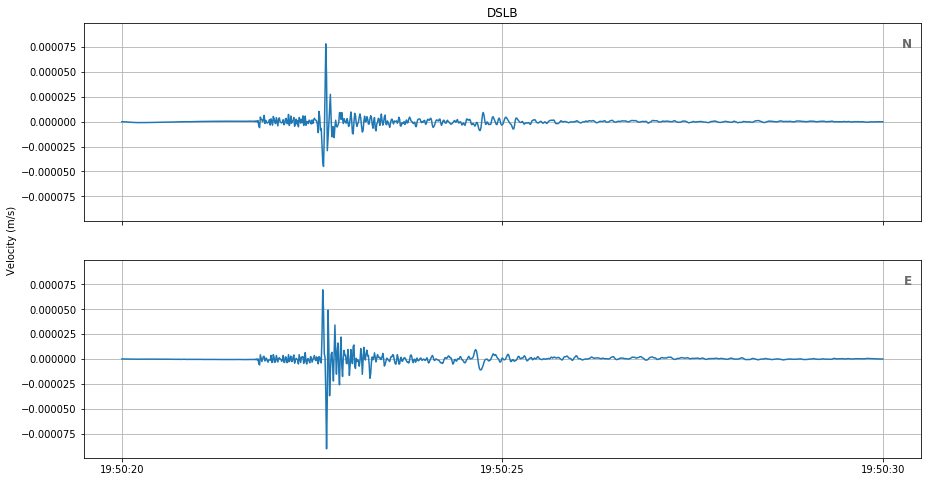

In [5]:
plot_seismograms([[n_t], [e_t]], size=(15, 8), titles=['N', 'E'], title='MOLT')
plot_seismograms([[n_s], [e_s]], size=(15, 8), titles=['N', 'E'], title='MOLS')
plot_seismograms([[n_b], [e_b]], size=(15, 8), titles=['N', 'E'], title='DSLB')

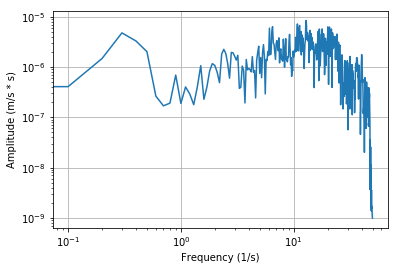

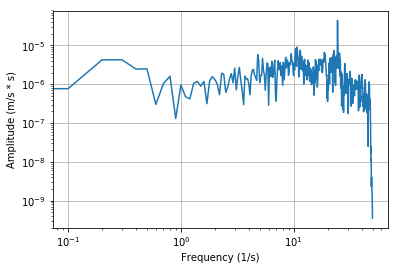

In [6]:
n_s.fas.plot()
e_s.fas.plot()

In [7]:
freq_t = (1, 30)
freq_s = (1, 20)

n_t_f = n_t.filter('bandpass', freq_t)
e_t_f = e_t.filter('bandpass', freq_t)

n_s_f = n_s.filter('bandpass', freq_s)
e_s_f = e_s.filter('bandpass', freq_s)

n_b_f = n_b.filter('bandpass', freq_t)
e_b_f = e_b.filter('bandpass', freq_t)

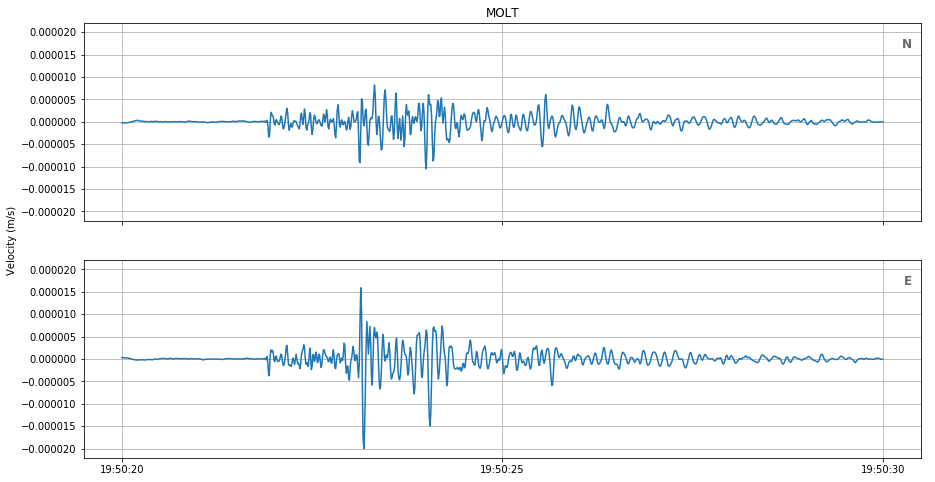

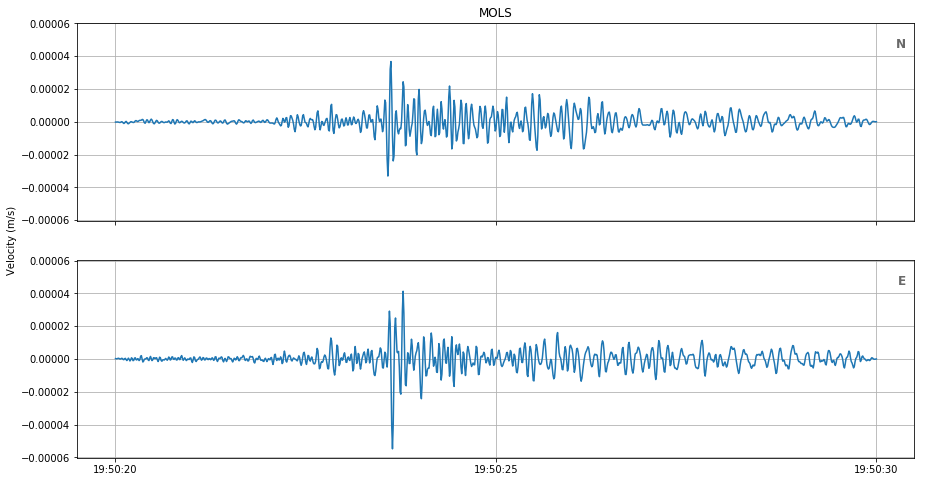

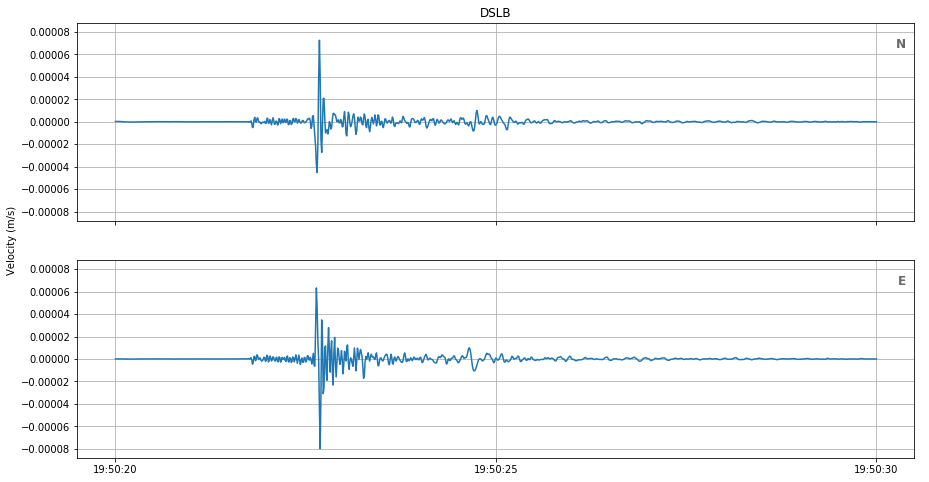

In [8]:
plot_seismograms([[n_t_f], [e_t_f]], titles=['N', 'E'], size=(15, 8), title='MOLT')
plot_seismograms([[n_s_f], [e_s_f]], titles=['N', 'E'], size=(15, 8), title='MOLS')
plot_seismograms([[n_b_f], [e_b_f]], titles=['N', 'E'], size=(15, 8), title='DSLB')

In [9]:
n_t_acc_f = Accelerogram.from_seismogram(n_t_f.differentiate())
e_t_acc_f = Accelerogram.from_seismogram(e_t_f.differentiate())

n_s_acc_f = Accelerogram.from_seismogram(n_s_f.differentiate())
e_s_acc_f = Accelerogram.from_seismogram(e_s_f.differentiate())

n_b_acc_f = Accelerogram.from_seismogram(n_b_f.differentiate())
e_b_acc_f = Accelerogram.from_seismogram(e_b_f.differentiate())

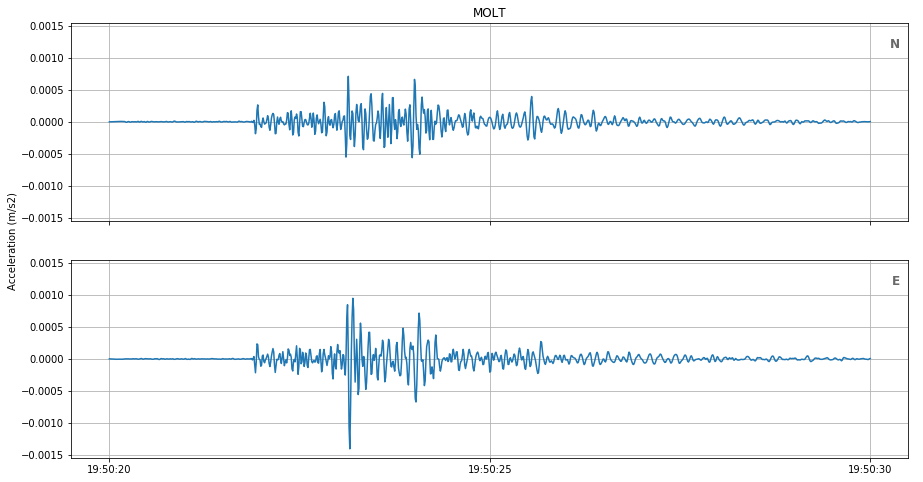

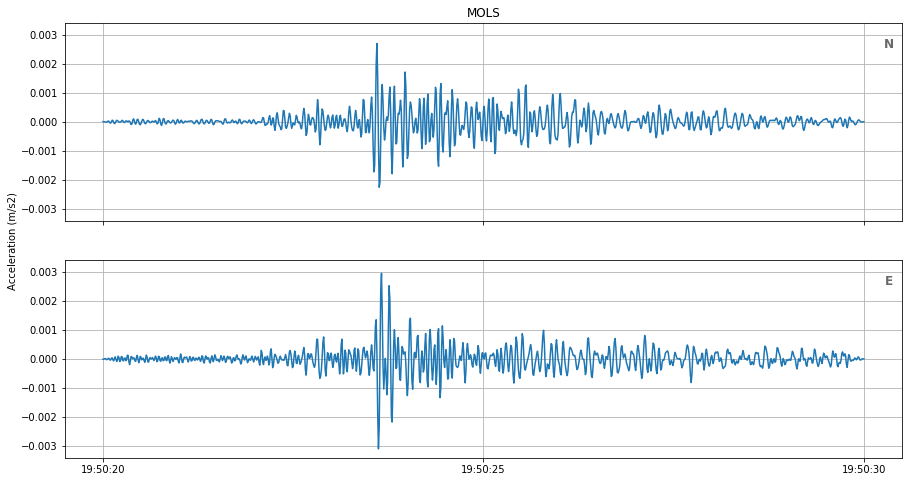

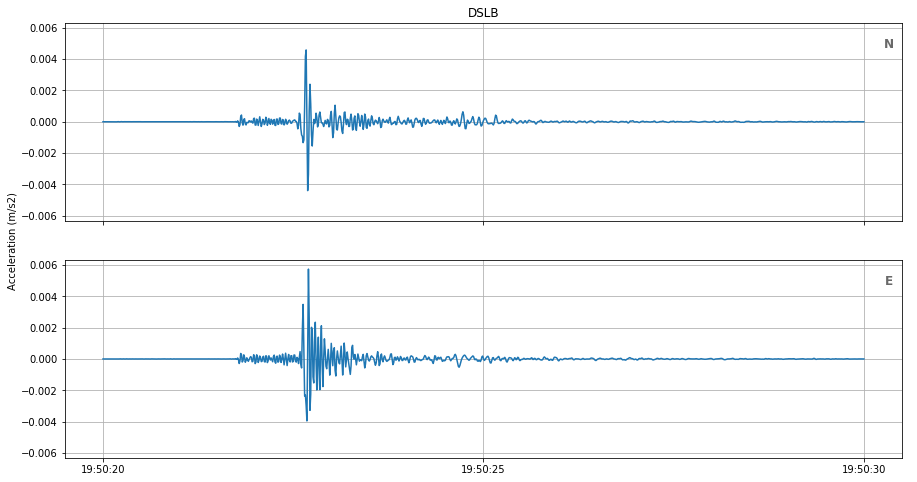

In [10]:
plot_seismograms([[n_t_acc_f], [e_t_acc_f]], size=(15, 8), titles=['N', 'E'], title='MOLT')
plot_seismograms([[n_s_acc_f], [e_s_acc_f]], size=(15, 8), titles=['N', 'E'], title='MOLS')
plot_seismograms([[n_b_acc_f], [e_b_acc_f]], size=(15, 8), titles=['N', 'E'], title='DSLB')

In [11]:
periods = np.logspace(-2, 0, 200)

n_t_rs_f = n_t_acc_f.get_response_spectrum(periods)
e_t_rs_f = e_t_acc_f.get_response_spectrum(periods)

n_s_rs_f = n_s_acc_f.get_response_spectrum(periods)
e_s_rs_f = e_s_acc_f.get_response_spectrum(periods)

n_b_rs_f = n_b_acc_f.get_response_spectrum(periods)
e_b_rs_f = e_b_acc_f.get_response_spectrum(periods)

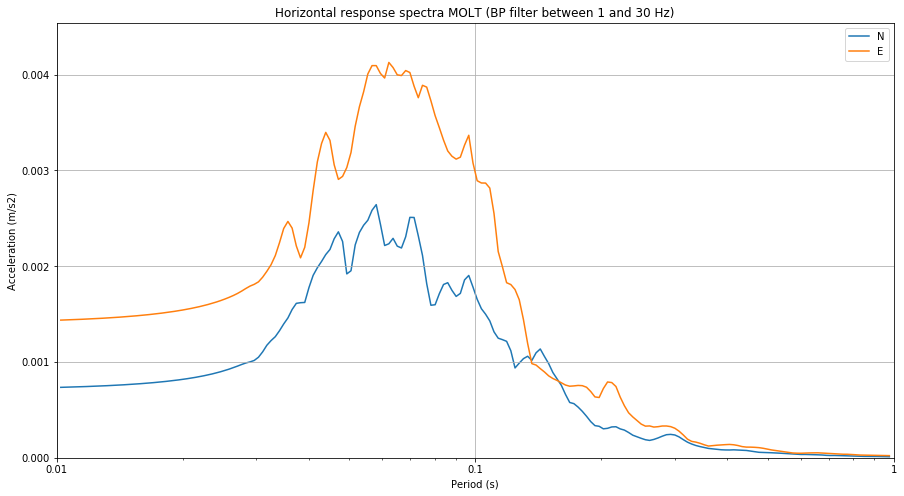

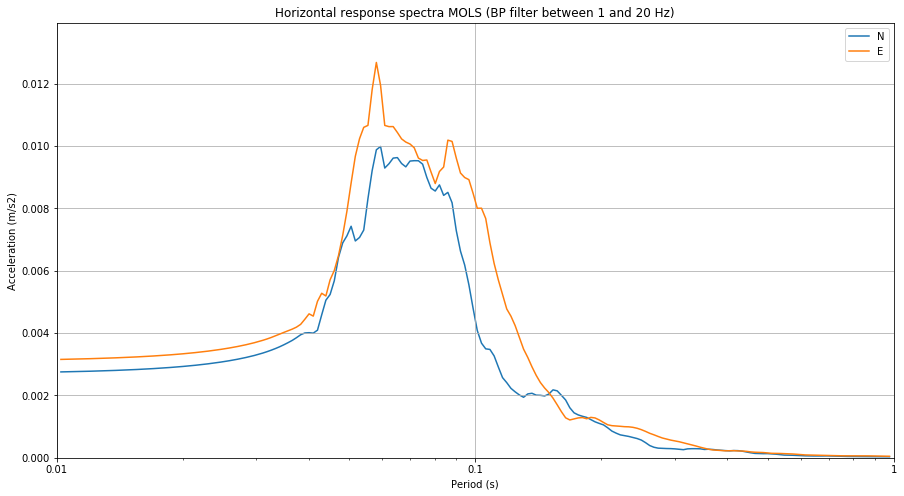

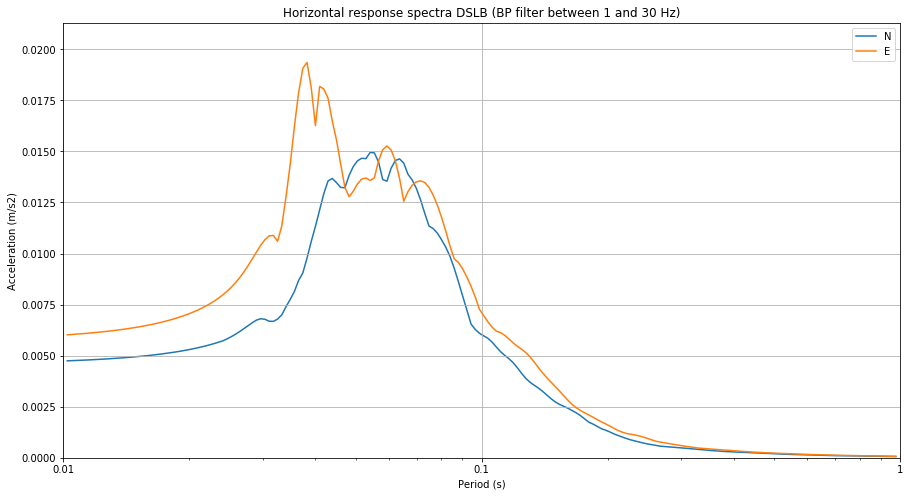

In [12]:
plot_response_spectra([n_t_rs_f, e_t_rs_f], labels=['N', 'E'], title='Horizontal response spectra MOLT (BP filter between 1 and 30 Hz)', size=(15, 8), min_period=0.01, max_period=1)
plot_response_spectra([n_s_rs_f, e_s_rs_f], labels=['N', 'E'], title='Horizontal response spectra MOLS (BP filter between 1 and 20 Hz)', size=(15, 8), min_period=0.01, max_period=1)
plot_response_spectra([n_b_rs_f, e_b_rs_f], labels=['N', 'E'], title='Horizontal response spectra DSLB (BP filter between 1 and 30 Hz)', size=(15, 8), min_period=0.01, max_period=1)

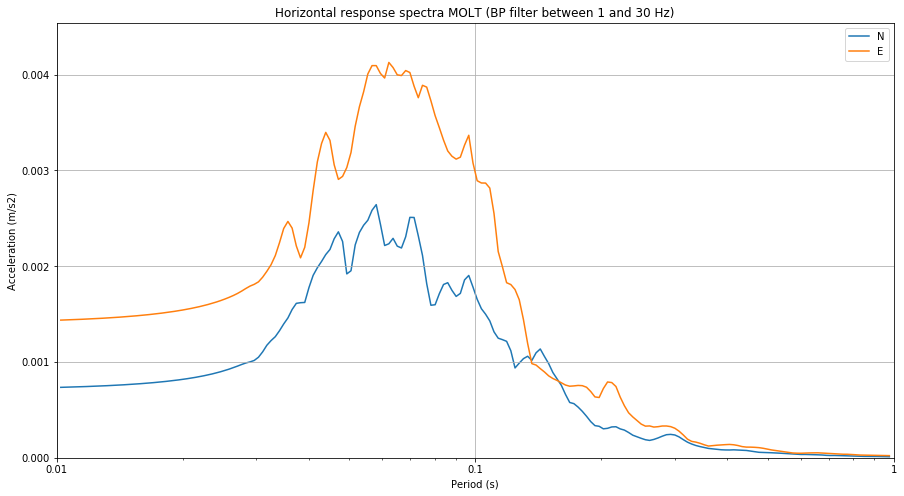

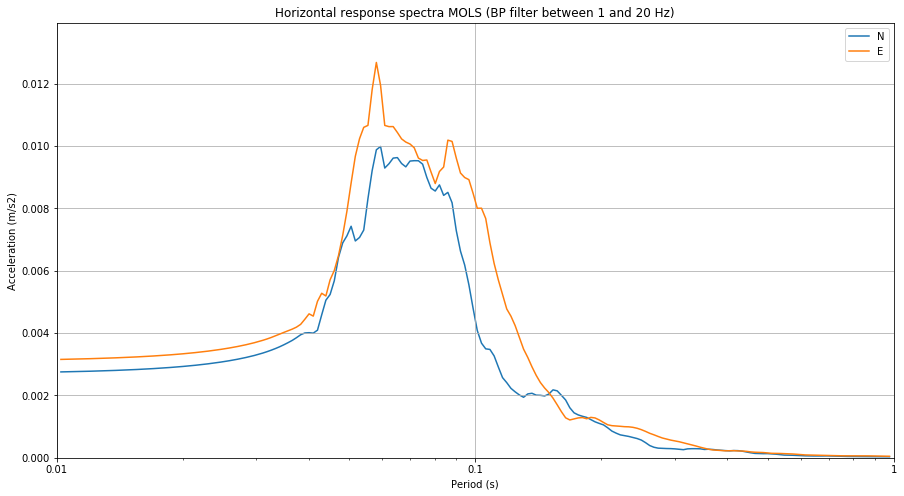

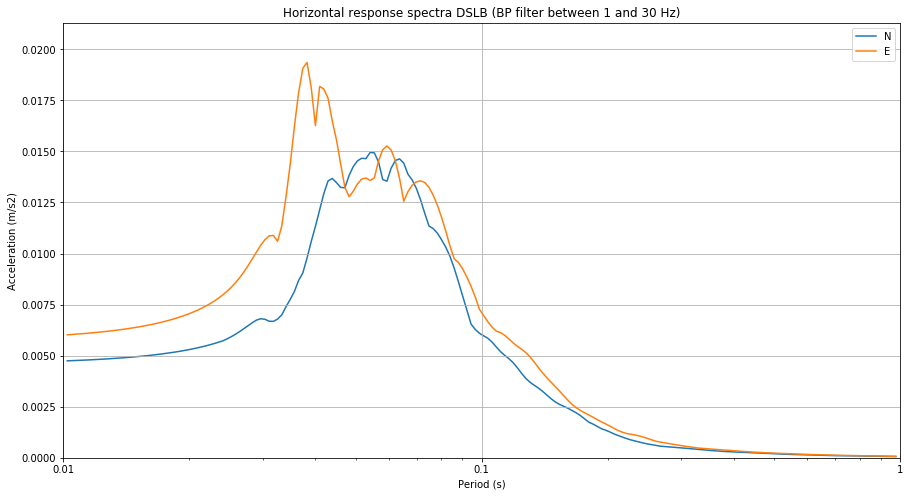

In [13]:
plot_response_spectra([n_t_rs_f, e_t_rs_f], labels=['N', 'E'], title='Horizontal response spectra MOLT (BP filter between 1 and 30 Hz)', size=(15, 8), min_period=0.01, max_period=1)
plot_response_spectra([n_s_rs_f, e_s_rs_f], labels=['N', 'E'], title='Horizontal response spectra MOLS (BP filter between 1 and 20 Hz)', size=(15, 8), min_period=0.01, max_period=1)
plot_response_spectra([n_b_rs_f, e_b_rs_f], labels=['N', 'E'], title='Horizontal response spectra DSLB (BP filter between 1 and 30 Hz)', size=(15, 8), min_period=0.01, max_period=1)